## Welcome to OpenVINO(TM) Hands-on Lab Session 1

This lab contains; brief informative tutorials, OpenVINO(TM) sample codes to run inside terminal & running `python` code right in this jupyter notebook.

Jupyter notebook is a browser based IDE and allows partial code executions and text based inputs as markdown at each cell.

Please follow the notations for each instruction in the following sections:

- If tutorial wants you run a certain command on terminal you will see the text as below. You should open a terminal or continue on the opened one as instructed. 

**Commands To Run on Terminal**
***
```bash
python3 
```
***

In Ubuntu, when you copy text, easiest way to paste code with keyboard is to press:

**SHIFT + INS** buttons

- If there are text looks like code; it is mainly the output of an example run of a sample code, please don't copy those back into terminal. 

**Example Terminal Output** 
***
``` output ```
***

- If you see python code inside the cell like below, take focus to cell by clicking to it then press:

**SHIFT + ENTER** 

or Click on `>| Run` run button above.

Below example is a code block, which you can run inside this browser session and see the output directly below the cell. You don't need to copy the code to terminal or any other IDE.

In [1]:
import numpy as np

arr1 = np.zeros(5)
print('Array 1 ', arr1)

arr2 = np.ones(5)
print('Array 2', arr2)

# Array Product 
print(arr1 * arr2)

Array 1  [0. 0. 0. 0. 0.]
Array 2 [1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


## Agenda

Below parts describes what we will cover in this Jupyter notebook. 

- **Part 1** Introduction to Intel(R) Distribution of OpenVINO(TM)
A brief introduction about toolkits and software packages of OpenVINO(TM), you may skip reading it.


- **Part 2** OpenVINO(TM) Demo Application
Running existing demos and understaing flow of them with step by step execution on terminal


- **Part 3** Model Zoo and Model Downloader
This part will cover the Model Zoo, Intel(R) Models and Model Downloader


- **Part 4** Model Optimizer 
This part covers the Model Optimizer


- **Part 5** Introduction to Inference Engine API 
This part includes quick code samples to work with Inference Engine API


**Notes**

- Output values are only samples, they can vary according to used hardware.
- *Other names and brands names, may be claimed as the property of others. 

## Part 1: What is Intel(R) Distribution of OpenVINO(TM)

Intel(R) Distribution of OpenVINO(TM), short for Open Visual Inference and Neural Network Optimization toolkit, delivers a set of software packages, libraries and scripts to speed up computer vision and deep learning application development with Deep Learning inference and fasten the deployment process.  

Intel(R) Distribution of OpenVINO(TM)'s main purpose is to speed-up inference, prediction process of Deep Learning models at all Intel(R) Hardware devices, CPU, GPU, VPU, FPGA and MYRIAD.

Note that, Intel(R) Distribution of OpenVINO(TM) do not help for training Deep Learning models.

OpenVINO(TM) installation comes with following software tools and libraries. 

- OpenCV*
- OpenVX*
- Intel(R) Media SDK
- Model Downloader
- Model Optimizer
- Inference Engine API
 
Model Downloader, Model Optimizer & Inference Engine API are placed under Deep Learning Deployment Toolkit to help Deep Learning deployment.

## Quick Intro

Some quick information about Intel(R) Distribution of OpenVINO(TM) to guide you through download, get source code and find documentations. 

All documents of Intel(R) Distribution of OpenVINO(TM) has been moved to https://docs.openvinotoolkit.org after R1 2019 release, they are no more available offline.

Getting started URL helps you to install and start using OpenVINO(TM) toolkit on your own development environment. 

- https://software.intel.com/en-us/openvino-toolkit/documentation/get-started

You can follow installation instructions for Linux, Windows & MacOS* separately. 

Intel(R) Distribution of OpenVINO(TM) helps you to choose between different hardware devices `CPU, GPU, MYRIAD, FPGA` to run inference process on the requested target device. 

All inference algorithms have been heavily optimized for each hardware platform with corresponding software library. 

- CPU algorithms have been optimized using Intel(R) Math Kernel Library - DNN
- GPU operations have been optimized using Intel's OpenCL Library.
- FPGA operations have been optimized with Intel(R) Deep Learning Acceleration Toolkit. 

During the installation process, do not skip the dependency installation parts, there are multiple dependencies which are not delivered with the installation, so follow the instructions for presquite installation and configuration steps provided in documentations.

In Linux distribution, OpenCL library, drivers, python packages and additional software libraries need to be installed to quickly start with OpenVINO(TM). Please do not skip the dependency installation parts when you get started. 

- https://software.intel.com/en-us/articles/OpenVINO-Install-Linux

Windows installation process requires additional steps to be completed: Visual Studio Builder installation for CMake builds, paths need to be correctly set and so on.

- https://software.intel.com/en-us/articles/OpenVINO-Install-Windows 

Intel OpenVINO not only provides software development kits, but also add additional tools to download popular open source Deep Learning models and Intel's own deep learning models to fasten development and deployment of Deep Learning applications. 

- **Model Downloader** is being used to download popular Deep Learning models developed with Caffe*, Tensorflow*, MxNet*, ONNX* and Kaldi*. Intel models are downloaded during installation and can be easily used. In below sections we will see how they are being used.


- **Model Optimizer** is being used to convert frozen models from Caffe*, Tensorflow*, MxNet*, ONNX* and Kaldi* to Intel(R) Distribution of OpenVINO(TM)'s IR files (.xml and .bin) to develop with them. Model Optimizer also provides couple more steps to additional configurations of the models. 

## Opensource OpenVINO Toolkit

OpenVINO(TM) is being integrated to OpenCV* project. Below URL is the main page for the open-source project. 

- https://01.org/openvinotoolkit 

Inference Engine and Model Optimizer are being maintained under DLDT project of OpenCV repository. 

- https://github.com/opencv/dldt 

Model Downloader and Intel Models are begin maintained under Open Model Zoo repository. Couple of populat Intel Model's (Plate Recognition) can be retrained using the scripts maintained here and also other frozen models can also be accesed from the below URL.

- https://github.com/opencv/open_model_zoo 

Finally, as a complementary for Open Model Zoo, training toolbox is also helpful to retrain couple of popular intel models, this is something under heavy development. 

- https://github.com/opencv/training_toolbox_tensorflow 

## Part 2: Intel(R) Distribution of OpenVINO(TM) Demos

In previous part, resources and some quick introduction to Intel(R) Distribution of OpenVINO(TM) has been made.

In this part, we will run the demos inside the toolkit to make a quick start with Intel(R) Distribution of OpenVINO(TM). 

In this part, we aim to validate our installation and see how sampes are working. 

- OpenVINO(TM) demo's has been placed under `/opt/intel/openvino/deployment_tools/demo` folder. 

These demos are the start points of OpenVINO(TM), they initially checks for dependencies and build the samples.


`classification_sample` is the first sample for image classification using SquezeNet
`security_barrier_demo` is used to show how Intel(R) models are working. 

### Classification Demo

Follow the instructions below to run the demos. 

Demo script first downloads the squeezenet1.1 Caffe model and then converts it to IR Files. After model conversion is completed `classification_sample` binary loads the model files to run classification on the image shown below. 

As an output you will only see the classification predictions for the image. 

![Car](images/car.png) 


**OPEN A NEW TERMINAL : PRESS (CTRL + ALT + T)**

#### FOLLOW THE INSTRUCTIONS BELOW

## 1
Setup Environment Variables, copy below command to terminal. Everytime you open a new terminal, this command has to be run to initialize environment variables to indicate shared libraries, headers and binaries installed with Intel(R) Distribution of OpenVINO(TM).

***
```bash
source /opt/intel/openvino/bin/setupvars.sh
```
***
Output (Don't Copy to Terminal):
***

> ```bash [setupvars.sh] OpenVINO environment initialized ```
***

## 2
Go to demo directory
***
```bash
cd /opt/intel/openvino/deployment_tools/demo
```
***

## 3

Run classification demo script
***
```bash
source demo_squeezenet_download_convert_run.sh
```
***
You will see some outputs as below 
***
```
817 0.8363345 label sports car, sport car
511 0.0946488 label convertible
479 0.0419131 label car wheel
751 0.0091071 label racer, race car, racing car
436 0.0068161 label beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon
656 0.0037564 label minivan
586 0.0025741 label half track
717 0.0016069 label pickup, pickup truck
864 0.0012027 label tow truck, tow car, wrecker
581 0.0005882 label grille, radiator grille
```
***

##  4
Now, we can go over the mentioned steps and understand the actual workflow. Therefore, we first use Model Downloader script to see how Model Downloader works and downloads `squeezenet 1.1` Caffe model (.prototxt and .caffemodel files)

***
```bash
cd /opt/intel/openvino/deployment_tools/tools/model_downloader/
```
***

##  5 

Let's see available models to download, copy below command to terminal and run. 
***
```bash
python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --print_all
```
***
When you execute above command you will see the list of available models to download.
***
```
========== All available topologies ==========

densenet-121
densenet-161
densenet-169
densenet-201
```
***

## 6

**At this stage, we are starting to replicate all the steps demo script**

**Note** If there is no internet connection you can skip this step, model already downloaded on the lab PCs. In following sections, we will download some of the models under `/home/intel/openvino_models` folder. At this section to ease of commands we download models to current directory.
***
```bash
sudo -E python3 downloader.py --name squeezenet1.1
```
***
We just got the squeezenet model to current directory. You will see the download output when you run the command.
***
```
###############|| Start downloading models ||###############

========= Downloading /opt/intel/openvino_2019.1.094/deployment_tools/tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.prototxt
... 100%, 9 KB, 12950 KB/s, 0 seconds passed

```
***

## 7

By default, model has been downloaded to current directory, output directory can be provided excplicitly too. Therefore, we now use Model Optimizer to create IR files to be used by our example software. 

***
```bash
ls /opt/intel/openvino/deployment_tools/tools/model_downloader/classification/squeezenet/1.1/caffe
```
***

**RUN BELOW COMMAND & CONVERT TO IR FILES**

***
```bash
sudo -E /opt/intel/openvino/deployment_tools/model_optimizer/mo.py --input_model /opt/intel/openvino/deployment_tools/tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.caffemodel
```
At this stage, we converted Caffe Model to OpenVINO(TM) IR. Without any further configurations so all the information is inherited from the input model and by defatult FP data type is FP32. Below output is a summary of configurations and result of optimization.

Output:
***

```bash
Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/opt/intel/openvino/deployment_tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.caffemodel
	- Path for generated IR: 	/opt/intel/openvino/deployment_tools/model_downloader/.
	- IR output name: 	squeezenet1.1
```
***

##  8
By the first run of the script, `classification_sample` application have been built under the `<home_dir>/inference_engine_samples/intel64/Release`, we wil navigate to directory to run `classification_sample`. 
***
```bash
cd /home/intel/inference_engine_samples_build/intel64/Release/
```
***

##  9

Now, we access to `classification_sample` binary and can use the binary to run classification sample on the sample image `car.png` so we first copy the image/model & labels into directory (or skip and provide full path) 

***
![Sample Car](images/car.png)
***

***
```bash
cp -t /home/intel/inference_engine_samples_build/intel64/Release/ /opt/intel/openvino/deployment_tools/demo/car.png /opt/intel/openvino/deployment_tools/demo/squeezenet1.1.labels /opt/intel/openvino/deployment_tools/tools/model_downloader/./squeezenet1.1.xml /opt/intel/openvino/deployment_tools/tools/model_downloader/./squeezenet1.1.bin
```
***

Run the classification sample on CPU
***
```bash
./classification_sample -i car.png -m squeezenet1.1.xml –d CPU
```

You will get the same output as running the demo script. 

##  10

We know how to use the sample application, you can see that targeted hardware device is CPU. Now, we can see how we can utilize GPU. Below sample uses FP32 IR files to run classification.

***
```bash
./classification_sample -i car.png -m squeezenet1.1.xml -d GPU
```
***

As you can realize, `clDNNPlugin` used compared to `MKLDNNPlugin`. (if it is not clDNN re-run the application) and got a slight improvement on the performance compared to CPU.

***
```
[ INFO ] Loading plugin

	API version ............ 1.5
	Build .................. 19154
	Description ....... clDNNPlugin
```
***

##  11
Let's use Model Optimizer to change data type to FP16 , where GPU runs faster.

***
```bash
sudo -E /opt/intel/openvino/deployment_tools/model_optimizer/mo.py --input_model /opt/intel/openvino/deployment_tools/tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.caffemodel --data_type FP16
 ```
***

Model outputs written directly to current directory you are in, so it overwrite the existing FP32 IR files. 

***
```bash
Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/opt/intel/openvino/deployment_tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.caffemodel
	- Path for generated IR: 	/home/intel/inference_engine_samples/intel64/Release/.
```
***

##  12
Let's try with FP16 and see the difference

***
```bash
./classification_sample -i car.png -m squeezenet1.1.xml -d GPU
```
***

Output:

***
```
total inference time: 4.4890200
Average running time of one iteration: 4.4890200 ms

Throughput: 222.7657718 FPS

[ INFO ] Execution successful
```
***

There is a significant change between FP32 and FP16. Total inference time was 5.8 and now it is 4.48 ms. FPS was 171 now it is 222. 

##  13
We can run the next demo and finalize this session. Second demo is using Intel Licence Plate Recognition (LPR) Model for Chineese Plates as below and called security_barrier_camera

`security_barrier_camera_demo` is a multi-model example which uses intel models, don't download or convert them. Application tries to find car and its attributes to detect license plate. When license plate detected, it converts it to text representation. 

This application only works with Chineese license plates at this time. However, you can go to training toolkit repo mentioned earlier to retrain models for your own custom use case. 

Open a new terminal (CTRL + ALT + T) and run below...

***
```bash
cd /opt/intel/openvino/deployment_tools/demo
```
***

***
```bash
./demo_security_barrier_camera.sh
```
***

This example will open a window showing the inference result as below:


Execution Output:

![Sample Car](images/security_camera_demo.png)

## Part 3: Model Zoo & Model Downloader

Intel(R) Distribution of OpenVINO(TM) aims to reduce development and deployment process. Therefore, toolkit provides pre-trained models and Model Downloader tool to get publicly available popular open source deep learning models and Intel models. 

Intel(R) models are:  

### Model Zoo

Since OpenVINO(TM) is become Open Source, below repo is being maintained to keep Intel Model's up-to dates. 

https://github.com/opencv/open_model_zoo


Model Downloader is stored under `/opt/intel/openvino/deployment_tools/tools/model_downloader`. 

Below is the command to list all available models.
Use `-h` command to see all the options of downloader script.

## 1

List all available Deep Learning models, which can be downloaded. 

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [2]:
# Here is a list of available models to download with downloader.py script
# Press (SHIFT + Enter or Click on Run Button)
!python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --print_all

densenet-121
densenet-161
densenet-169
densenet-201
squeezenet1.0
squeezenet1.1
mtcnn-p
mtcnn-r
mtcnn-o
mobilenet-ssd
vgg19
vgg16
ssd512
ssd300
inception-resnet-v2
dilation
googlenet-v1
googlenet-v2
googlenet-v4
alexnet
ssd_mobilenet_v2_coco
resnet-50
resnet-101
resnet-152
googlenet-v3
se-inception
se-resnet-101
se-resnet-152
se-resnet-50
se-resnext-50
se-resnext-101
Sphereface
license-plate-recognition-barrier-0007
mobilenet-v1-1.0-224
mobilenet-v2
faster_rcnn_inception_v2_coco
deeplabv3
ctpn
ssd_mobilenet_v1_coco
faster_rcnn_resnet101_coco
mobilenet-v2-1.4-224
age-gender-recognition-retail-0013
age-gender-recognition-retail-0013-fp16
emotions-recognition-retail-0003
emotions-recognition-retail-0003-fp16
face-detection-adas-0001
face-detection-adas-0001-fp16
face-detection-retail-0004
face-detection-retail-0004-fp16
face-person-detection-retail-0002
face-person-detection-retail-0002-fp16
face-reidentification-retail-0095
face-reidentification-retail-0095-fp16
facial-landmarks-35-adas-

Let's download a public Caffe model `MobileNet SSD`, which we will be using in later sessions for object detection. We will download all the public models and converted IR files to `home/intel/openvino_models` folder. 

Raw models are downloaded to `/home/intel/openvino_models/models` folder automatically. 

Note: If you don't have internet connection you can skip below part because it requires internet connection to download raw model, which is already available. 

## 2

Download MobileNet-SSD Object Detection Model with Below Command.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [3]:
# If there is no internet connection, you can get error, don't worry it is already downloaded.
# Press (SHIFT + Enter or Click on Run Button)
!python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name mobilenet-ssd -o /home/intel/openvino_models/models


###############|| Downloading topologies ||###############

========= Downloading /home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.prototxt
... 100%, 28 KB, 32883 KB/s, 0 seconds passed

========= Downloading /home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel
... 100%, 22605 KB, 399 KB/s, 56 seconds passed


###############|| Post processing ||###############



### Reference Command for Downloading GoogleNet Model. 

**NOTE: This is just a for your reference, models already downloaded. You don't need to run the commands below**

***
```bash

python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name googlenet-v4 -o /home/intel/openvino_models/models

###############|| Start downloading models ||###############

...100%, 84 KB, 534 KB/s, 0 seconds passed ========= googlenet-v4.prototxt ====> /home/intel/openvino_models/models/classification/googlenet/v4/caffe/googlenet-v4.prototxt

###############|| Start downloading weights ||###############

...100%, 166774 KB, 1625 KB/s, 102 seconds passed ========= googlenet-v4.caffemodel ====> /home/intel/openvino_models/models/classification/googlenet/v4/caffe/googlenet-v4.caffemodel

###############|| Start downloading topologies in tarballs ||###############


###############|| Post processing ||###############
```
***

### Reference Command for Downloading Alexnet 

**NOTE: This is just a for your reference, models already downloaded. You don't need to run the commands below**

***
```bash
python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name alexnet -o /home/intel/openvino_models/models

###############|| Start downloading models ||###############

...100%, 3 KB, 9855 KB/s, 0 seconds passed ========= alexnet.prototxt ====> /home/intel/openvino_models/models/classification/alexnet/caffe/alexnet.prototxt

###############|| Start downloading weights ||###############

...100%, 238146 KB, 336 KB/s, 707 seconds passed ========= alexnet.caffemodel ====> /home/intel/openvino_models/models/classification/alexnet/caffe/alexnet.caffemodel

###############|| Start downloading topologies in tarballs ||###############


###############|| Post processing ||###############

========= Changing input dimensions in alexnet.prototxt =========
```
***

## 3

List GoogleNet and AlexNet Model Files.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [4]:
# See that Alexnet and Googlenet is downloaded
# Press (SHIFT + Enter or Click on Run Button)
!ls /home/intel/openvino_models/models/classification/alexnet/caffe
!ls /home/intel/openvino_models/models/classification/googlenet/v4/caffe

alexnet.caffemodel  alexnet.prototxt
googlenet-v4.caffemodel  googlenet-v4.prototxt


## Part 4: Model Optimizer

Model Optimizer used to convert and optimize existing models to IR after certain static topological analysis of existing Caffe*, Tensorflow*, MxNet*, ONNX* and Kaldi* models. 

- Batch Normalisation
- Mean Variance Normalisation
- Horizontal Fusion
- L2 Normalization Pattern
- Constant Folding
- Convolutional/Deconvolutional Grouping
- Linear Operation Fusion

See the Modeol Optimizer documentation for detailed explanations of optimizations.

In below example, we want to convert previously downloaded `mobilenet-ssd` Caffe* model to OpenVINO(TM) IR files, both for FP16 and FP32 data types.

As you will see during the command executions, `--scale` and `--mean_values` used for this model conversion. Mobilenet SSD uses RGB images which are scaled to `224x224` and normalized with scale factor `1/256` and substracted mean values `127` before training so we need similar things. 

Model Optimizer can achive these type of optimization during conversion so while working with mobilenet-ssd, you don't need to normalize image during run time. 

- `scale` means : `All input values coming from original network inputs will be divided by this value.`
- `mean_values` means: `Mean values to be used for the input image per channel. Values to be provided in the (R,G,B) or [R,G,B] format.`

## 1

Convert Caffe Model Files (MobileNet-SSD) to Intel(R) Distribution of OpenVINO(TM) IR Files (.xml , .bin) 

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [5]:
# FP 32 Optimization and Convertion
# Press (SHIFT + Enter or Click on Run Button)
!python3 /opt/intel/openvino/deployment_tools/model_optimizer/mo.py \
--input_model "/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel" \
--output_dir /home/intel/openvino_models/ir/mobilenet-ssd/FP32 --data_type FP32 --scale 256 --mean_values [127,127,127]

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel
	- Path for generated IR: 	/home/intel/openvino_models/ir/mobilenet-ssd/FP32
	- IR output name: 	mobilenet-ssd
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	[127,127,127]
	- Scale values: 	Not specified
	- Scale factor: 	256.0
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
Caffe specific parameters:
	- Enable resnet optimization: 	True
	- Path to the Input prototxt: 	/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.prototxt

## 2

Convert Caffe Model Files (MobileNet-SSD) to Intel(R) Distribution of OpenVINO(TM) IR Files (.xml , .bin) with FP16 Data Type.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [6]:
# FP 16 Optimization and Convertion
# Press (SHIFT + Enter or Click on Run Button)
!python3 /opt/intel/openvino/deployment_tools/model_optimizer/mo.py \
--input_model "/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel" \
--output_dir /home/intel/openvino_models/ir/mobilenet-ssd/FP16 --data_type FP16 --scale 256 --mean_values [127,127,127]

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel
	- Path for generated IR: 	/home/intel/openvino_models/ir/mobilenet-ssd/FP16
	- IR output name: 	mobilenet-ssd
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	[127,127,127]
	- Scale values: 	Not specified
	- Scale factor: 	256.0
	- Precision of IR: 	FP16
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
Caffe specific parameters:
	- Enable resnet optimization: 	True
	- Path to the Input prototxt: 	/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.prototxt

## Part 5: Inference Engine Python API

At this part, we will make a brief introduction to Inference Engine Python API and see how you can implement inference with IE API. 

C++ API don't change much in logic, so when you get familiar with IE you could implement your own inference easily.

Run each cell respectively, and at the end we will run inference on CPU, GPU respectively to see the inference results. 

### Import Required Libraries and Set Environment Variables

Since we will use other utilities, there we need other Python libraries to help us execution. 

Secondly, we need to set environment variables where OpenVINO(TM) python packages are stored. It is already done for this Jupyter* Notebook environment and shown in the following command.

#### Python code blocks run inside the cells, in order to run below code, don't copy and paste it to terminal. Change focus to cell and press (SHIFT + ENTER) or click on Run button. 

#### If you don't see any output after the run of Python code, that means code successfully run inside the cell and you can skip to next cell and execute accordingly. 

## 1

Import Required Python Libraries including OpenVINO(TM) Library

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [7]:
# Press (SHIFT + Enter or Click on Run Button)
# Required Libraries Imported
import sys
import os
import time
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Import Required OpenVINO(TM) Libraries
from openvino.inference_engine import IEPlugin, IENetwork

print('SUCCESS')

SUCCESS


## 2

Show Environment Variables

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [8]:
# Press (SHIFT + Enter or Click on Run Button)
# See that PYTHONPATH includes Intel CV Python path which includes OpenVINO Python Modules
!echo $PYTHONPATH

/opt/intel/openvino/python/python3.5:/opt/intel/openvino/deployment_tools/model_optimizer:/opt/intel/openvino/python/python3.5:/opt/intel/openvino/deployment_tools/model_optimizer


### IEPlugin

Now we must select the device used for the inferencing. This is done by loading the appropriate plugin (library) to initialize the specified device run time. In some cases, we need to load the extensions library (if specified) provided in the extension folder for the device. Extension library provides additional implementation of Deep Learning layers. 

The following cell constructs `IEPlugin` object.

## 3

Implementing Method to Load Device Library

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [9]:
# Press (SHIFT + Enter or Click on Run Button)

def createPlugin(target_device, extension_list):
    # Plugin initialization for specified device. We will be targeting CPU initially.
    plugin = IEPlugin(device=target_device)

    # Loading additional kernel extension libraries for the CPU
    if target_device == 'CPU':
        for extension in extension_list:
            plugin.add_cpu_extension('/home/intel/inference_engine_samples_build/intel64/Release/lib/libcpu_extension.so')

    return plugin

print('SUCCESS')

SUCCESS


### IENetwork

Now, we load the network and weights of that network. This part, creates initial network which is used later to create inference requests. 

## 4

Implement Method to Load Deep Learning Model with using IR Files

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [10]:
# Press (SHIFT + Enter or Click on Run Button)
def createNetwork(model_xml, model_bin, plugin):
    
    # Importing network weights from IR models.
    net = IENetwork(model=model_xml, weights=model_bin)

    # Some layers in IR models may be unsupported by some plugins so we check if there any unsupported layers
    if "CPU" in plugin.device:
        supported_layers = plugin.get_supported_layers(net)
        not_supported_layers = [l for l in net.layers.keys() if l not in supported_layers]
        if len(not_supported_layers) != 0:
            print("Following layers are not supported by the plugin for specified device {}:\n {}".
                      format(plugin.device, ', '.join(not_supported_layers)))
            return None
    return net

print('SUCCESS')

SUCCESS


### ExecutableNetwork

When IEPlugin and IENetwork loaded, ExecutableNetwork object used to create inference requests on the network and target device. This is an intermediate access to IENetwork and target device. 

You will see `input_blob` and `output_blob` objects. Which defines the input shape and output shape of the networks. 

`input_blob` shows us in what shape our inputs should be. 
`output_blob` determines the output of inference. 

## 5

Implement Method to Create Executable Network for Inference Request

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [11]:
# Press (SHIFT + Enter or Click on Run Button)
def loadNetwork(plugin, net):
    # Loading IR model to the plugin.
    exec_net = plugin.load(network=net, num_requests=2)
    
    # Getting the input and outputs of the network
    input_blob = next(iter(net.inputs))
    
    out_blob = next(iter(net.outputs))
    
    return exec_net,input_blob,out_blob

print('SUCCESS')

SUCCESS


### Input Pre-processing

In previous parts, we have created methods to provide required objects to run inference. However, we also need pre-processing of images. 

Since, we already determined the normalisation during the model optimization, there only need a shape transformation of the input image. Below, method only helps us to do transformation and resize.

## 6

Implement Image Pre-Processing Method to Create Binary Object Required for Inference Engine

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [12]:
# Press (SHIFT + Enter or Click on Run Button)
def preprocessImage(img_path, net, input_blob):
    # Reading the frame from a jpeg file
    frame = cv.imread(img_path)
    
    # Reshaping data
    n, c, h, w = net.inputs[input_blob].shape
    in_frame = cv.resize(frame, (w, h))
    in_frame = in_frame.transpose((2, 0, 1))  # Change data layout from HWC to CHW
    
    return in_frame.reshape((n, c, h, w)),frame

print('SUCCESS')

SUCCESS


### Inference

Let's do the inference. 

Below, method helps us to define inference process from start to end. 

- Load IEPlugin, IENetwork, ExecutableNetwork with provided IR and Target.

- Pre-process Input Image

- Send image to ExecutableNetwork and `Infer`

- Print the inferred image.

## 7

Implement Inference Method to Get Model Files, Target Device and Input File to Run Inference with OpenVINO(TM) Inference Engine. See Implementation Details of below method to understand how inference being used.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [13]:
# Press (SHIFT + Enter or Click on Run Button)

# For labeling the image
from out_process import placeBoxes

labels_map = {0:'background',1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat',
              9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant',
              17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

# Request id to keep track of
def runInference(device='CPU', 
                 model_xml='/home/intel/openvino_models/ir/mobilenet-ssd/FP32/mobilenet-ssd.xml', 
                 model_bin='/home/intel/openvino_models/ir/mobilenet-ssd/FP32/mobilenet-ssd.bin',
                 image_file='images/car.png',
                 confidence_threshold=0.6):
    # Get Plugin
    plugin = createPlugin(target_device=device, extension_list=['/home/intel/inference_engine_samples_build/intel64/Release/lib/libcpu_extension.so'])
    
    # Get Network
    net = createNetwork(model_xml, model_bin, plugin)
    
    # Get Executable Network, Input and Output Layer Information
    exec_net,input_blob,out_blob = loadNetwork(plugin, net)
    
    # Pre-process Image According to Input Layer
    in_frame,original_frame = preprocessImage(image_file, net, input_blob)

    # Starting the inference in async mode, which starts the inference in parallel
    inference_start = time.time()
    
    # Start Infering given Frame/Image
    exec_net.infer(inputs={input_blob: in_frame})
    
    # Getting the result of the network
    res = exec_net.requests[0].outputs[out_blob]
    inference_end = time.time()
    # Processing the output result and adding labels on the image. Implementation is not shown in the
    #  this notebook; you can find it in object_detection_demo_ssd_async.py
    initial_w = original_frame.shape[1]
    initial_h = original_frame.shape[0]

    # Out Process/Draw Boxes
    frame = placeBoxes(res, labels_map, confidence_threshold, original_frame, initial_w, initial_h, False, 0, ((inference_end - inference_start)))
    # We use pyplot because it plays nicer with Jupyter Notebooks
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111)
    ax.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB), interpolation='none')
    plt.axis("off")
    plt.show()
        
    return None

print('SUCCESS')

SUCCESS


## 8

Command to Show CPU Information of Running Device

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [14]:
# Press (SHIFT + Enter or Click on Run Button)
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 142
model name	: Intel(R) Core(TM) i5-7300U CPU @ 2.60GHz
stepping	: 9
microcode	: 0x8e
cpu MHz		: 2920.107
cache size	: 3072 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 22
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf tsc_known_freq pni pclmulqdq dtes64 monitor ds_cpl vmx smx est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand lahf_lm abm 3dnowprefetch cpuid_fault epb invpcid_single pti ssbd ibrs ibpb stibp tpr_shadow vnmi flexpriority ept vpid fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx rdseed adx smap clflushopt intel_pt xsaveopt xs

## 9

Run Inference on CPU

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

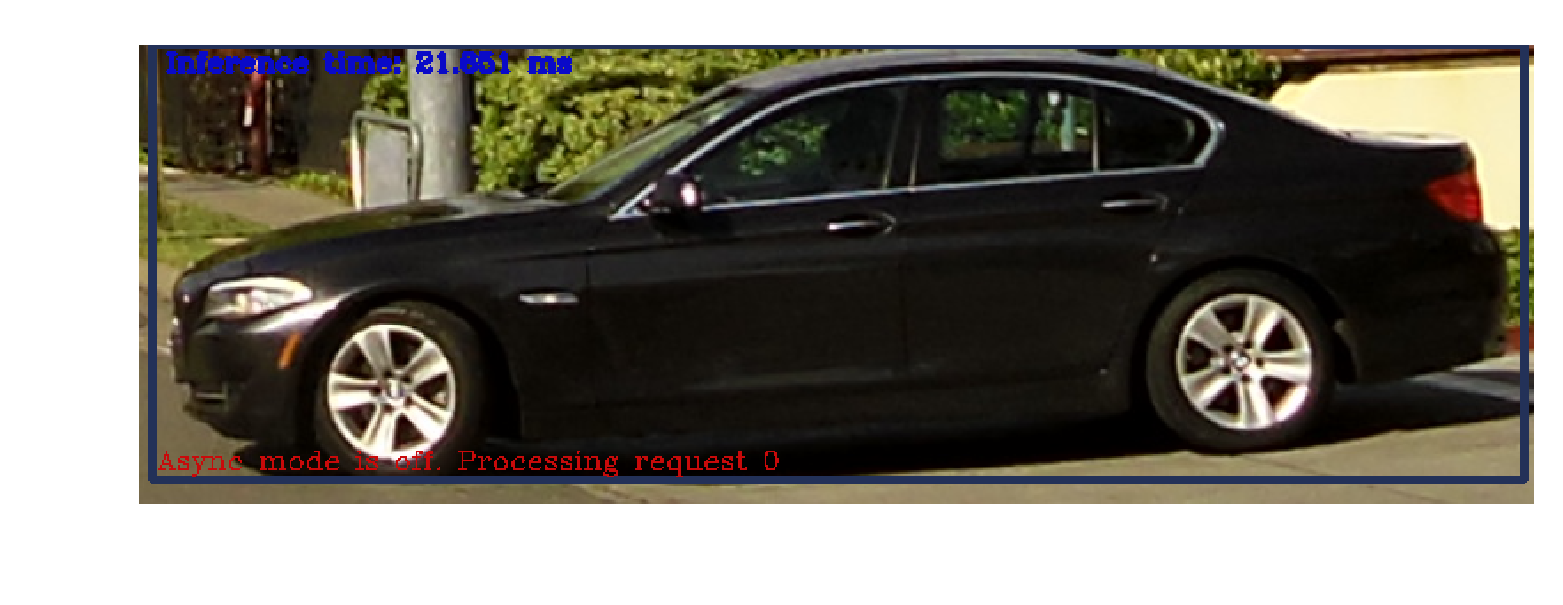

In [15]:
# Press (SHIFT + Enter or Click on Run Button)

# CPU Inference
runInference('CPU')

In order to see the GPU on the system run the following command on terminal

```bash
lspci -nn -s 0:02.0
```

## 10

Run Command to Show GPU Information

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [16]:
# Press (SHIFT + Enter or Click on Run Button)
!lspci -nn -s 0:02.0

00:02.0 VGA compatible controller [0300]: Intel Corporation HD Graphics 620 [8086:5916] (rev 02)


## 11

Run Inference on GPU with FP32 Converted Model

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

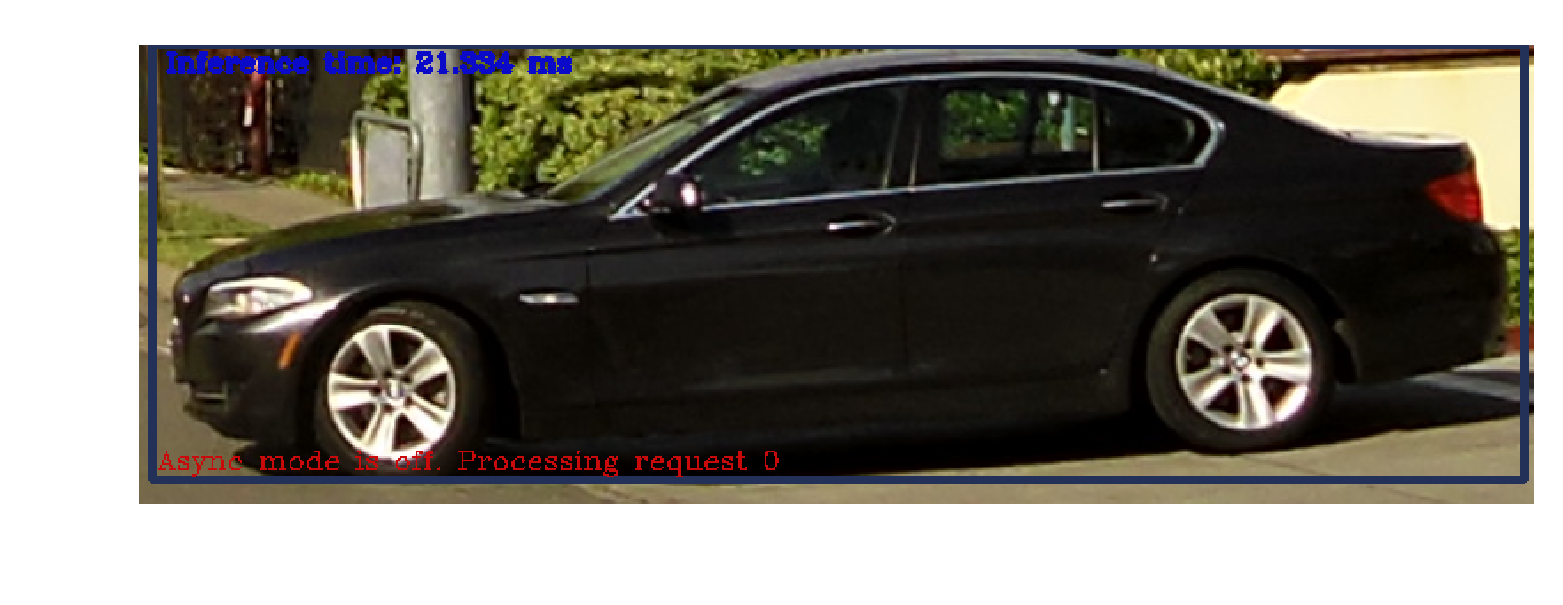

In [17]:
# Press (SHIFT + Enter or Click on Run Button)
runInference("GPU")

## 12

Run Inference on GPU with FP16 Converted Model

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

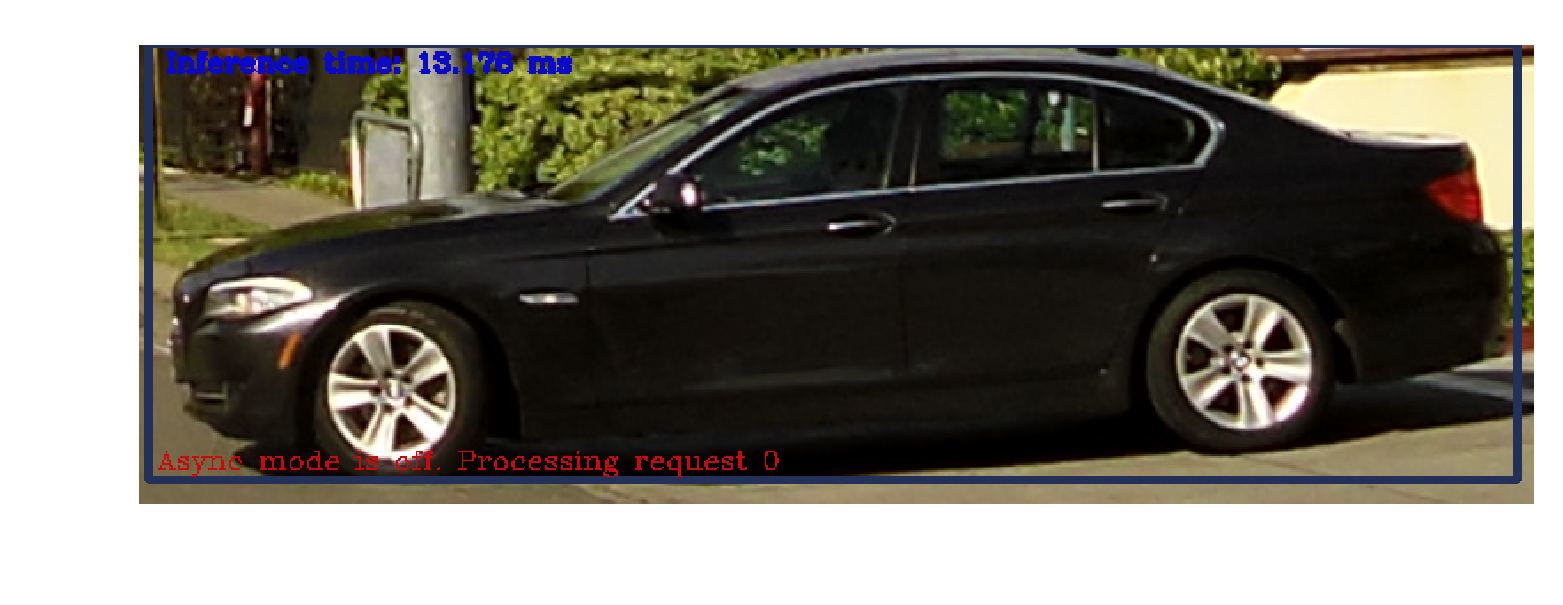

In [18]:
# Press (SHIFT + Enter or Click on Run Button)
runInference(device='GPU', 
             model_xml='/home/intel/openvino_models/ir/mobilenet-ssd/FP16/mobilenet-ssd.xml', 
             model_bin='/home/intel/openvino_models/ir/mobilenet-ssd/FP16/mobilenet-ssd.bin')

# FOLLOW UP SESSION

## Security Barrier Follow Up

You can see the execution commands from the script outputs. You can change them and try to run with different images, target platroms etc. 

Below command will run `security_barrier_camera_demo` on GPU, we will also go over a similar example with multiple models and multiple targets. 

```bash
cd /home/intel/inference_engine_samples_build/intel64/Release/

./security_barrier_camera_demo -d GPU -d_va GPU -d_lpr GPU -i /opt/intel/openvino/deployment_tools/demo/car_1.bmp -m /home/intel/openvino_models/ir/FP32/Security/object_detection/barrier/0106/dldt/vehicle-license-plate-detection-barrier-0106.xml -m_va //home/intel/openvino_models/ir/FP32/Security/object_attributes/vehicle/resnet10_update_1/dldt/vehicle-attributes-recognition-barrier-0039.xml -m_lpr /home/intel/openvino_models/ir/FP32/Security/optical_character_recognition/license_plate/dldt/license-plate-recognition-barrier-0001.xml

[ INFO ] InferenceEngine: 
	API version ............ 1.4
	Build .................. 19154
[ INFO ] Parsing input parameters
[ INFO ] Capturing video streams from the video files or loading images
[ INFO ] Files were added: 1
[ INFO ]     /opt/intel/openvino/deployment_tools/demo/car_1.bmp
[ INFO ] Number of input image files: 1
[ INFO ] Number of input video files: 0
[ INFO ] Number of input channels:    1
[ INFO ] Loading plugin GPU

	API version ............ 1.5
	Build .................. 19154
	Description ....... clDNNPlugin
[ INFO ] Loading network files for VehicleDetection
[ INFO ] Batch size is forced to  1
[ INFO ] Checking Vehicle Detection inputs
[ INFO ] Checking Vehicle Detection outputs
[ INFO ] Loading Vehicle Detection model to the GPU plugin
[ INFO ] Loading network files for VehicleAttribs
[ INFO ] Batch size is forced to 1 for Vehicle Attribs
[ INFO ] Checking VehicleAttribs inputs
[ INFO ] Checking Vehicle Attribs outputs
[ INFO ] Loading Vehicle Attribs model to the GPU plugin
[ INFO ] Loading network files for Licence Plate Recognition (LPR)
[ INFO ] Batch size is forced to  1 for LPR Network
[ INFO ] Checking LPR Network inputs
[ INFO ] Checking LPR Network outputs
[ INFO ] Loading LPR model to the GPU plugin
[ INFO ] Start inference 

Avarage inference time: 27.3022 ms (36.6271 fps)

Total execution time: 11845.8
```

## Building All Samples

This is an extra stage, which is already done for you, but for future reference it is good to have all the commands.

Let's get into home directory.

***
```bash 
cd /home/intel
```
***

If `inference_engine_samples_build` folder exists, **remove** and remake it.

***
```bash
rm -rf /home/intel/inference_engine_samples_build && mkdir /home/intel/inference_engine_samples_build
```
***

***
```bash
cd /home/intel/inference_engine_samples_build
```
***

Then, we will recreate build files in this folder. 

***
```bash
source /opt/intel/openvino/bin/setupvars.sh
```
***

***
```bash
cmake /opt/intel/openvino/deployment_tools/inference_engine/samples/
```
***

***
```bash
make all -j8
```
***

After, successfull make all the sample applications will be ready to use in `/home/intel/inference_engine_samples/intel64/Release` folder.

***
```bash
ls /home/intel/inference_engine_samples_build/intel64/Release
```
***